In [1]:
import numpy as np
import pandas as pd
import random
import math
import seaborn as sns
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
from scipy.stats import truncnorm
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 5)

#### 1. Generate Data

In [2]:
random.seed(50120057)

#### 1-1. Create data X between (-2,2)
#### 1-2. Create N*D size matrix

In [3]:
N = 4000
D = 2
x =  np.linspace(start = -2, stop = 2, num = N)
X = np.transpose(np.array([np.repeat(1,N),x]))

#### 1-3. Set true value of $\beta$

In [29]:
tr_beta = [-1,2.5]

#### 1-4. By using probit function, obtain the vector of probability of success p

In [30]:
p_mat = norm.cdf(np.dot(X,tr_beta))

#### 1-5. Generate binary observation data y based on p

In [31]:
y = np.random.binomial(1, p_mat, N)

In [32]:
N1 = sum(np.random.binomial(1,p_mat,N))
N0 = N - N1

#### 2. Gibbs Sampler Step

#### 2-1. Set prior of beta

In [33]:
beta_0 = np.repeat(0,D)
sig_0 = np.identity(D)

#### 2-2. Set initial value

In [34]:
T = 5000
u = np.concatenate((np.zeros(N0),np.ones(N1)), axis=None)
beta_mat = np.zeros((T,D))

#### 2-3. Gibbs Sampler Step

In [36]:
def get_truncated_normal(mean=0, sd=1, low=0, upp=10):
       return truncnorm(
           (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

In [37]:
for iter in range(1,T):
    
    #### 1. sampling step of latent variable U
    
    mu_u = np.dot(X,beta_mat[iter-1,])
    
    w0_X = get_truncated_normal(mean = mu_u[np.where(y==0)], sd = 1, low = -np.inf, upp = 0)
    u[np.where(y==0)] = w0_X.rvs()
    
    w1_X = get_truncated_normal(mean = mu_u[np.where(y==1)], sd = 1, low = 0 , upp = np.inf)
    u[np.where(y==1)] = w1_X.rvs()

    #### 2. sampling step of parameter beta
  
    sig_pi = np.linalg.inv((np.dot(X.transpose(),X) + np.linalg.inv(sig_0)))
    mu_pi = np.dot(sig_pi,(np.dot(X.transpose(),u) + np.dot(np.linalg.inv(sig_0),beta_0)))
    beta_mat[iter,:] = np.random.multivariate_normal(mu_pi, sig_pi,1)

#### 3. Checking Trace plot

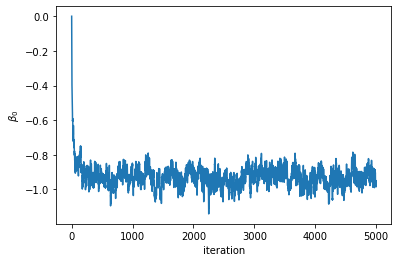

In [38]:
plt.plot(beta_mat[:,0])
plt.xlabel("iteration")
plt.ylabel(r'$\beta_{0}$')
plt.show()

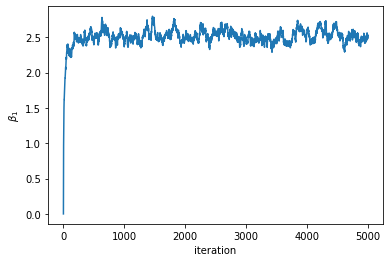

In [39]:
plt.plot(beta_mat[:,1])
plt.xlabel("iteration")
plt.ylabel(r'$\beta_{1}$')
plt.show()